# Introduction of New Python Packages/Tools

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#New packages not explored in module
import missingno as msno

from exploratory_analysis_SS import visualize_target, visualize_outliers, display_cross_tabulations
from data_preprocessing_AE import handle_missing_values, remove_duplicates, handle_outliers, apply_smote
from lr_model_AM import train_logistic_regression, evaluate_model
from data_visualization_DG import plot_roc_curve, visualize_confusion_matrix

# 1. Framing the Problem

Our aim was to make the mortgage process more transparent and efficient, our project employs logistic regression, a data analysis technique that is used to forecast the results of a binary dependent variable using one or more independent variables.The goal is to predict whether an applicant will receive approval for their requested home loan. This prediction is based on various factors that financial institutions consider significant, such as income levels, credit history, loan amount, and property area, among others.

The choice of logistic regression is rooted on its effectiveness for binary outcome prediction—here, loan approval (Yes) or denial (No). This technique is particularly beneficial for our tasks because it can manage different kinds of independent variables and provides probability estimates.

Also, this model aids in identifying the factors that significantly impact loan approval decisions. This understanding can guide applicants in strengthening their profiles to increase the chances of approval. For financial institutions, it provides a more smooth loan assessment process, ensuring that decisions are made on a consistent, objective, and fair basis.

# 2. Collecting the data

Our dataset is on Home Loan Approval and can be found on Kaggle: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_train.csv

We used the training dataset as this contained a larger set of data, which will help our model to train & predict more accurately. The dataset consists of the following columns and data types:

    - Loan ID (Object): A unique ID for each loan application
    - Gender (Object): Gender of applicant
    - Married (Object): Applicants marital status
    - Dependents (Object): Applicants number of dependents  
    - Education (Object): Highest level of education
    - Self_Employed (Object): Is the applicant self-employed or not
    - ApplicantIncome (Int64): The applicants yearly income
    - CoapplicantIncome (Float64): If there is a co-applicant, what is there yearly income?
    - LoanAmount (Float64): Requested loan amount by applicant
    - Loan_Amount_Term (Float64): The term for the the loan amount lended
    - Credit_History (Float64): A record of the applicants credit history
    - Property_Area (Object): Area where the applicant is purchasing their home
    - Loan_Status (Object): The status of the loan (Approved or Not Approved)
    
When using the Home Loan Approval dataset its essential for us to consider the several social, legal, and ethical implications that may arise. We ensured that the data was sourced ethically and anonymously, making sure there is no way to reverse-engineer the data to identify individuals. With the Home Loan Approval dataset, there is room for a considerabe amount of bias especially with variables like Gender, Education, and Area. Legally, our analysis must comply with data protection laws like GDPR, emphasizing the importance of consent, transparency, and the right to explanation.

Reading in the data:

In [3]:
file_path = r'C:\Users\amber.engert\OneDrive - Connect\Documents\University\Python\CW2\loan_sanction.csv'

loan = pd.read_csv(file_path)

# 3. Exploratory Analysis

Exploratory Data Analysis (EDA) is a key step in our data alaysis process. It is used to give an idea into the makeup of our data, providing insights, useful trends and structure of the data. EDA looks for patterns, trends or relationships within our dataset. A lot of this employs charts and graphs to convey the information.

loan.info(): Provides a summary of dataset attributes including data types and non-null counts per column, helping in understanding data completeness and types.

loan.describe(): Offers statistics like mean, standard deviation, and quartiles for numerical columns, giving insights into the distribution and spread of the data.

loan.head(): Displays the initial rows of the dataset, offering a quick glance at data entries and column names, helping understand the structure and content of the dataset quickly.

In [4]:
#Displaying the basic information about the dataset
loan.info()

#Displaying the descriptive statistics: column name, data type, count....

loan.describe()

#Displaying the first few rows of the dataframe
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In order to see how each variable in the dataset relates to another, we have produced a pair plot. This clearly allows us to see the relationships within the data that could not be observed by simply reading it.

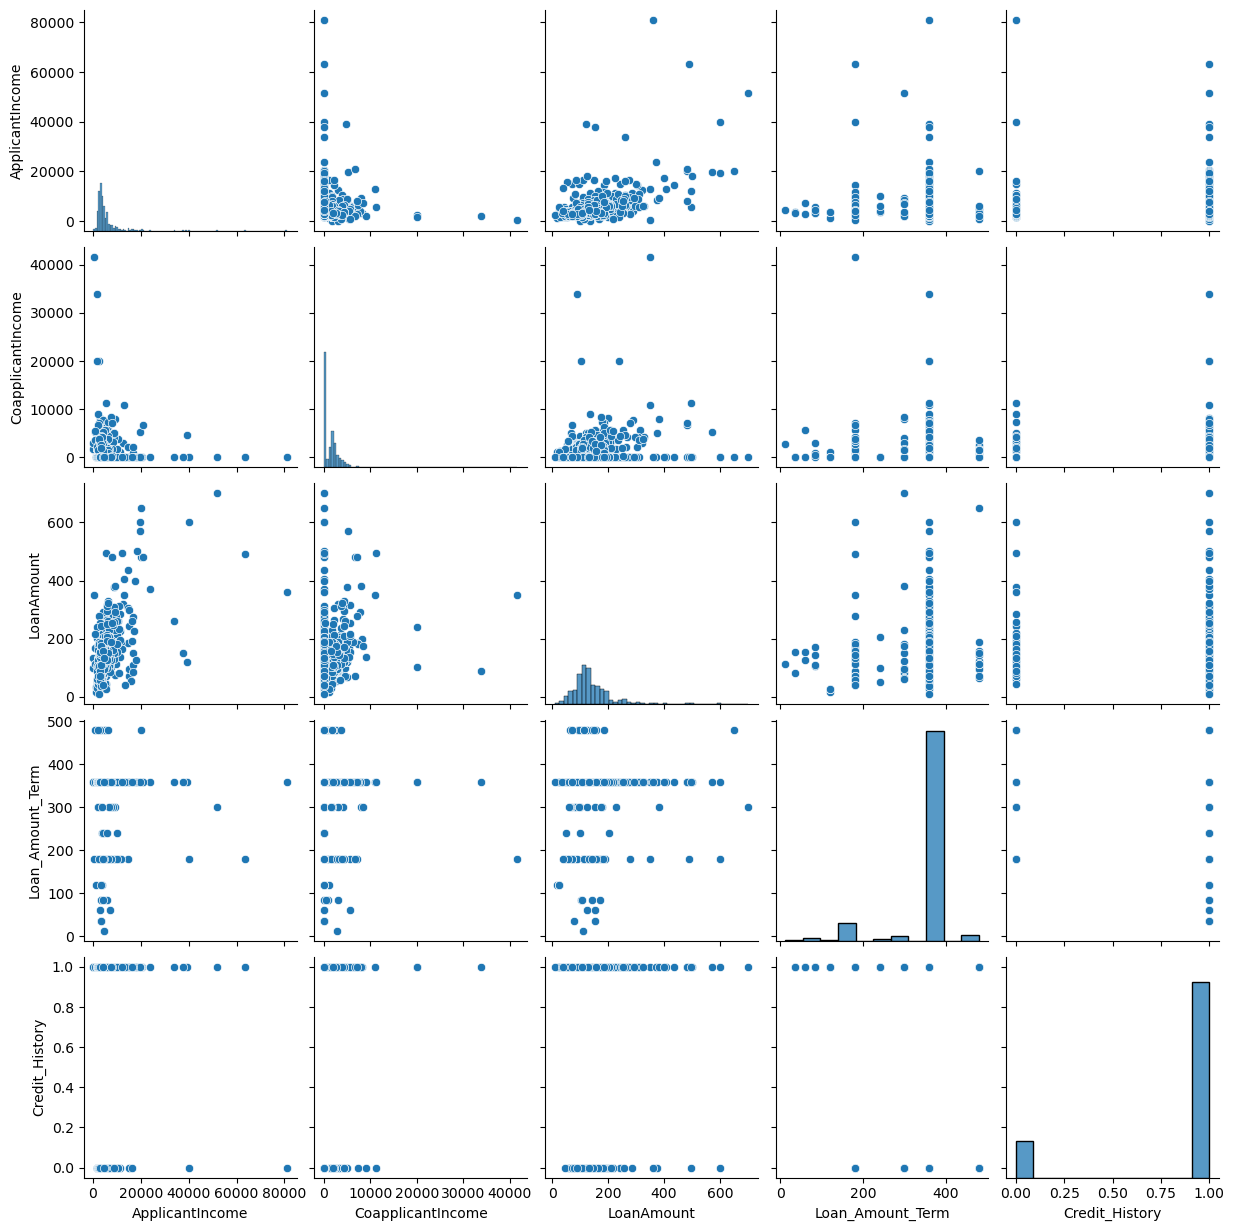

In [5]:
#Pairplot for visulaising all pairwise relationships in dataframe
sns.pairplot(loan)

The code below generates a histogram for the numerical features within the loan dataset. The line 'loan.hist(figsize=(12, 10), bins=20)' calls for the 'hist' method on the 'loan' dataframe. This produces a histogram or each numerical column in the dataset. Histograms provide us with a visual represntation of our data. It helps us identigy outliers and value that deviate from the rest.

The figsize parameter adjusts the size of the plot, while bins controls the number of bins for data discretization. By providing a visual summary of numerical feature distributions, it facilitates insights into data characteristics and potential anomalies.

Text(0.5, 0.98, 'Histogram of Numerical Features: Frequency & Feature Values')

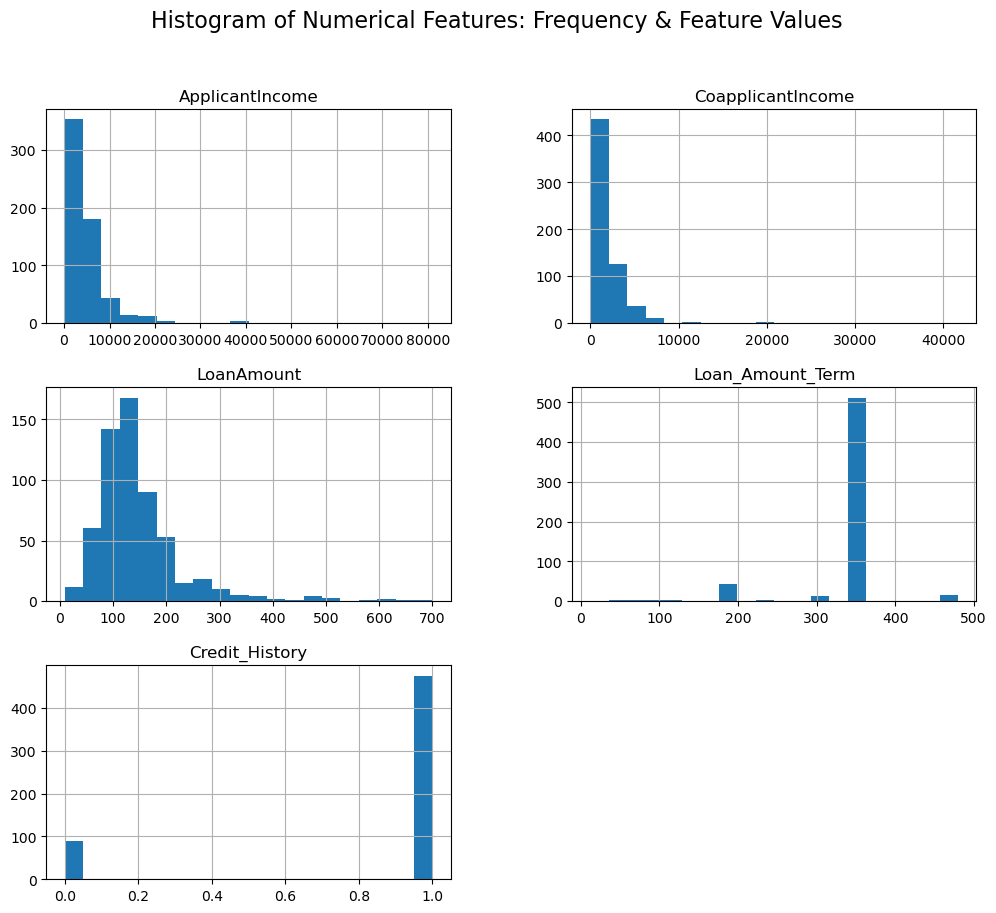

In [6]:
#Distribution of numerical features within dataset
loan.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogram of Numerical Features: Frequency & Feature Values", fontsize=16)



The line 'visualize_outliers(loan, numerical_columns)' is called from the 'visualize_outliers' funtion passing in the loan DataFrame and the numerical_columns list as arguments. The visualize_outliers function is a custom function from the exploratory analysis module designed specifically for this project.

This function's purpose is to visually identify outliers within the specified numerical columns of the dataset. By focusing on key numerical attributes like income and loan amounts, the code helps pinpoint potential data anomalies that could affect analyses or modeling outcomes, promoting data quality assessment and informed decision-making processes.

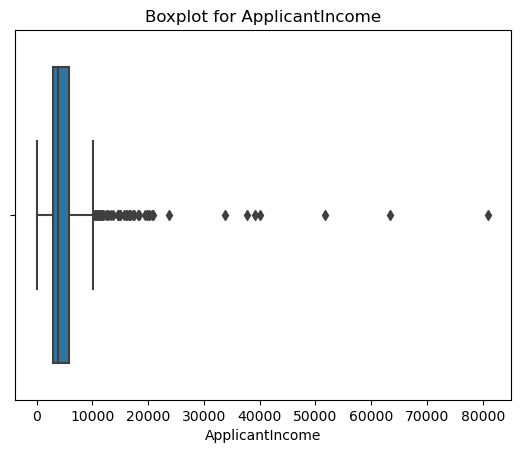

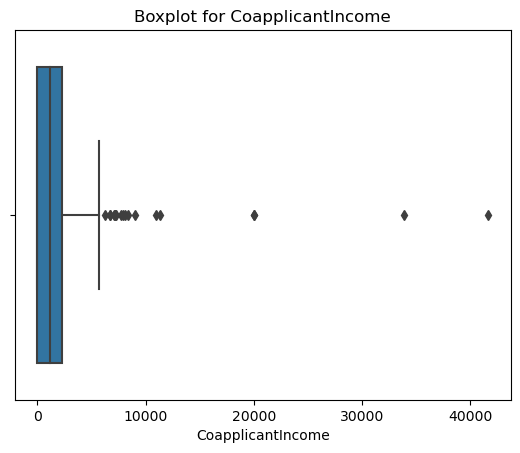

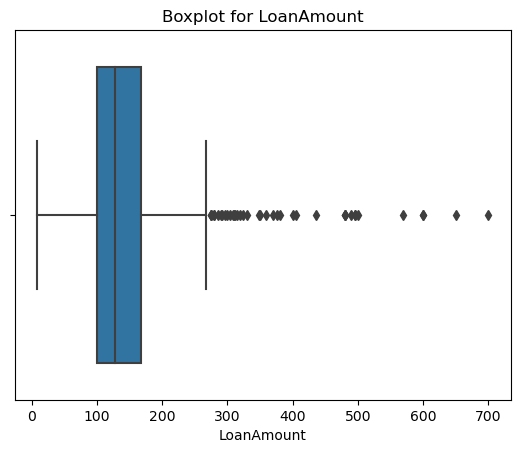

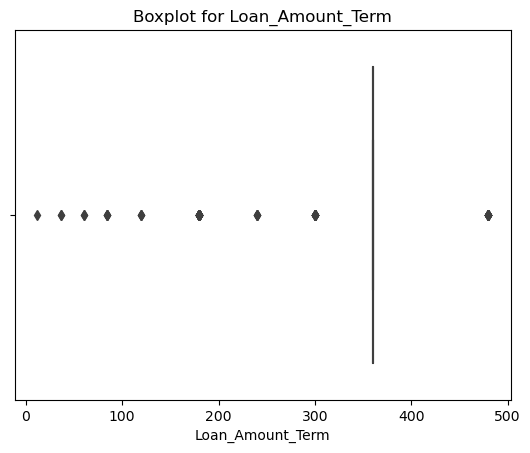

In [7]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
visualize_outliers(loan, numerical_columns)

The line 'loan.isnull().sum()' of code is used to count the number of missing values in each column of the 'loan' DataFrame. In order to, check and display the count of missing values in each column of the loan dataset, by calculating the sum of null values for each column. we have called the loan.isnull().sum() functions from our exploratory_analysis module. It aids in understanding the extent of missing data across different features.

The line 'msno.matrix(loan)' is used to viusalise said missing values through a matrix plot aided through the missingno library. The aim of this is to provide us with insight into the understanding of the extent and patterns of missing data.

<Axes: >

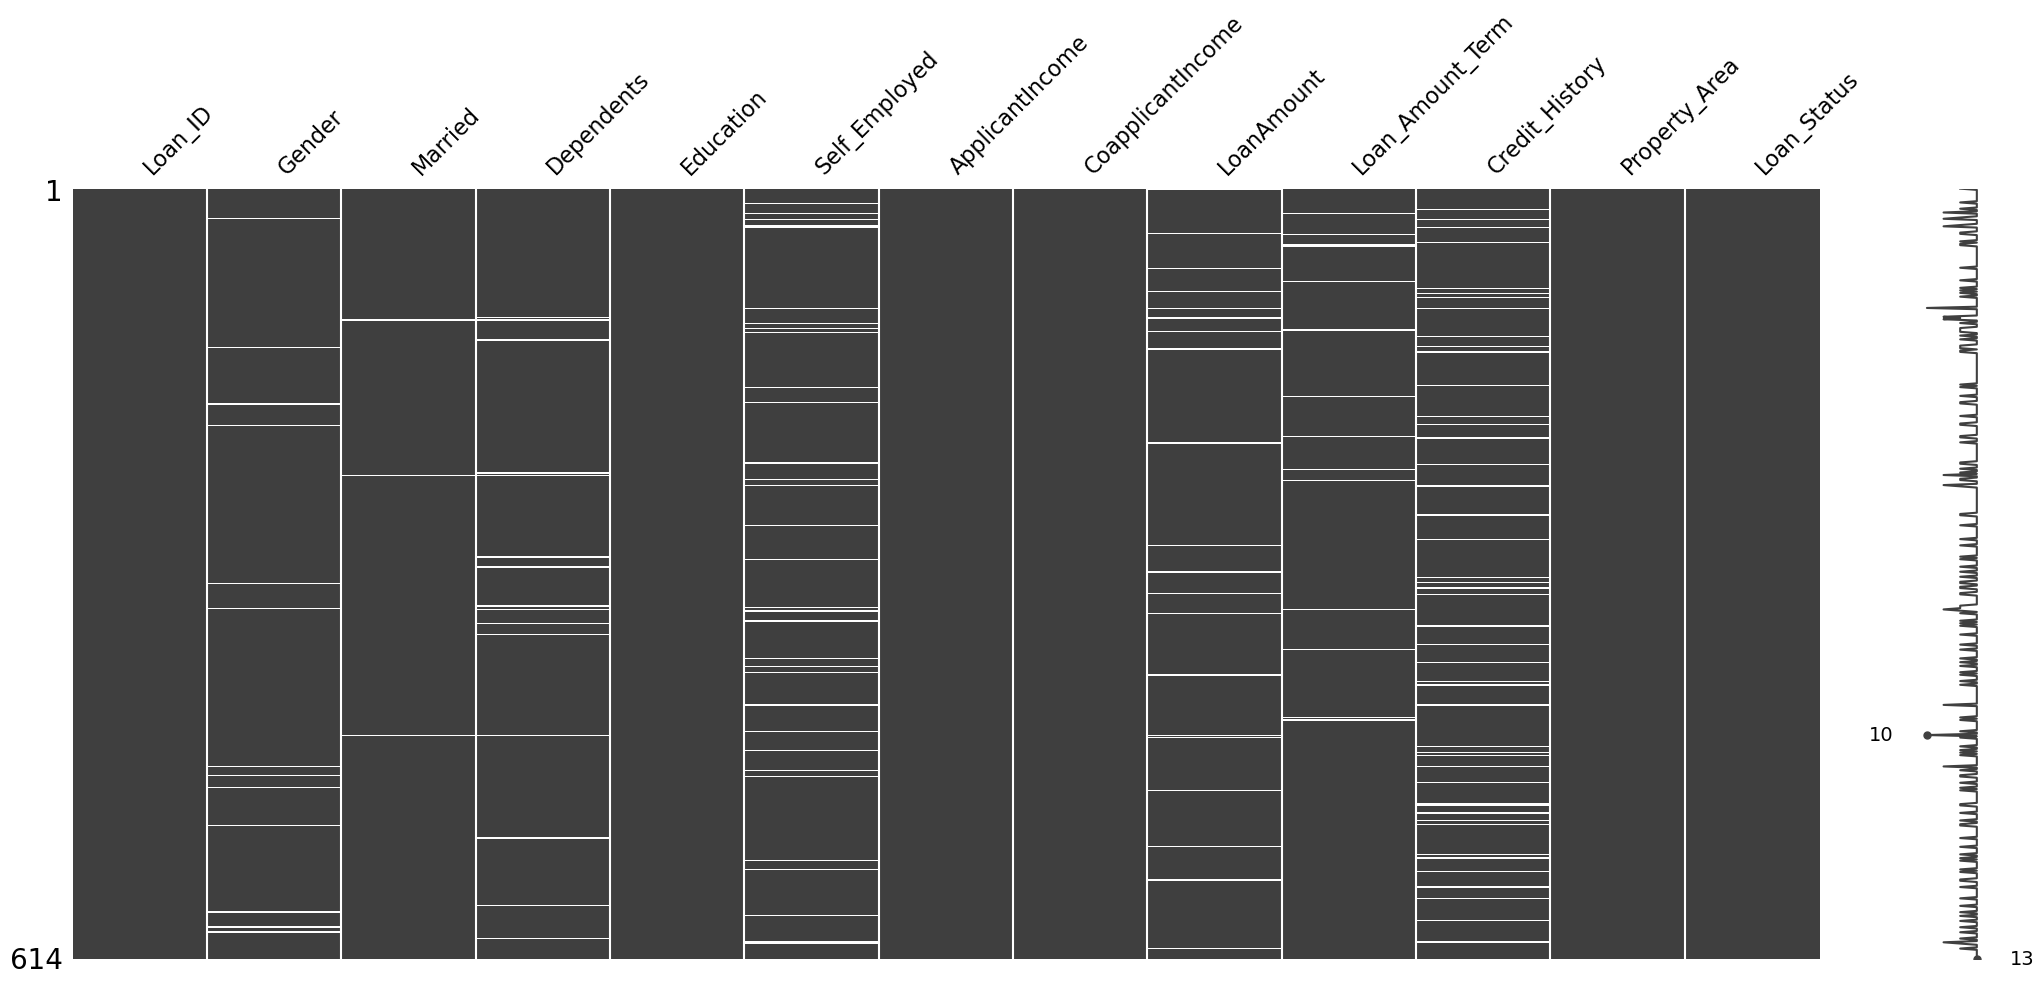

In [8]:
# Display missing values
loan.isnull().sum()

# Visualize missing values
msno.matrix(loan)


In order to view the cross-tabulations between categorical variables and the target variable, Loan_Status within our dataset, we have called the display_cross_tabulations function from our exploratory_analysis module.

Each cross-tabulation displays the frequency distribution of Loan_Status categories (N and Y) across unique values of the corresponding categorical variable.

It helps reveal how various factors such as Gender, Married status, Dependents, Education level, Self_Employment status, and Property_Area influence loan approval.

By identifying patterns and associations, these cross-tabulations assist in understanding the impact of different variables on loan approval decisions. Such analyses are vital for making data-driven decisions in loan processing and risk assessment tasks

In [9]:
display_cross_tabulations(loan)



Cross-tabulation for Loan_ID against Loan_Status:

Loan_Status  N  Y
Loan_ID          
LP001002     0  1
LP001003     1  0
LP001005     0  1
LP001006     0  1
LP001008     0  1
...         .. ..
LP002978     0  1
LP002979     0  1
LP002983     0  1
LP002984     0  1
LP002990     1  0

[614 rows x 2 columns]

Cross-tabulation for Gender against Loan_Status:

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Cross-tabulation for Married against Loan_Status:

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Cross-tabulation for Dependents against Loan_Status:

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

Cross-tabulation for Education against Loan_Status:

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

Cross-tabulation for Self_Employed against Loan_Status:

Loan_Status      N  

In order to view the current distribution of Loan Status within our dataset, we have called the visualize_target function from our exploratory_analysis module. It is important to visulaize your target distribution when working with machine learning models, as an imbalanced dataset can cause a model to predict based on which target appears the most rather than learn from the data.

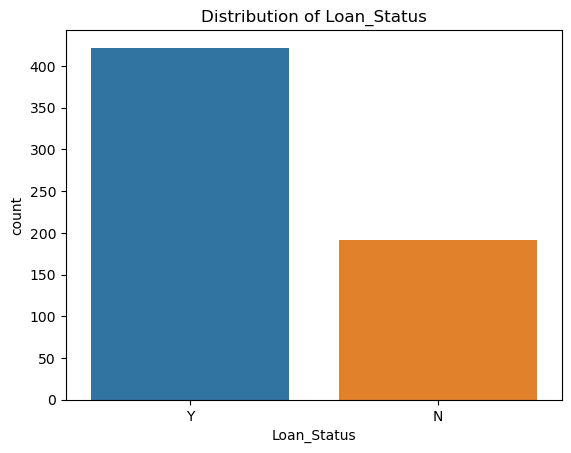

In [10]:
#Visualizing target distribution
loan = visualize_target(loan, 'Loan_Status')

# 4. Data Preprocessing

The first step for our data preprocessing is to remove the Loan ID column. This column is not necessary for our later analysis, so dropping it is a sensible option. All other columns directly relate to the Loan Status, so must remain.

In [11]:
loan.drop('Loan_ID',axis=1, inplace=True)

From our exploratory analysis above, we can see that there are missing values in both categorical and numerical features within the dataset. To avoid data loss, we do not want to simply remove these rows from the dataset. Below, we have imported a function from the data preporcessing module that we have created which does the following:

    - For Categorical values, replace missing values with the mode of the column
    - For numerical values, replace missing values with the mean of the column

In [12]:
#Calling the module
loan = handle_missing_values(loan)


<Axes: >

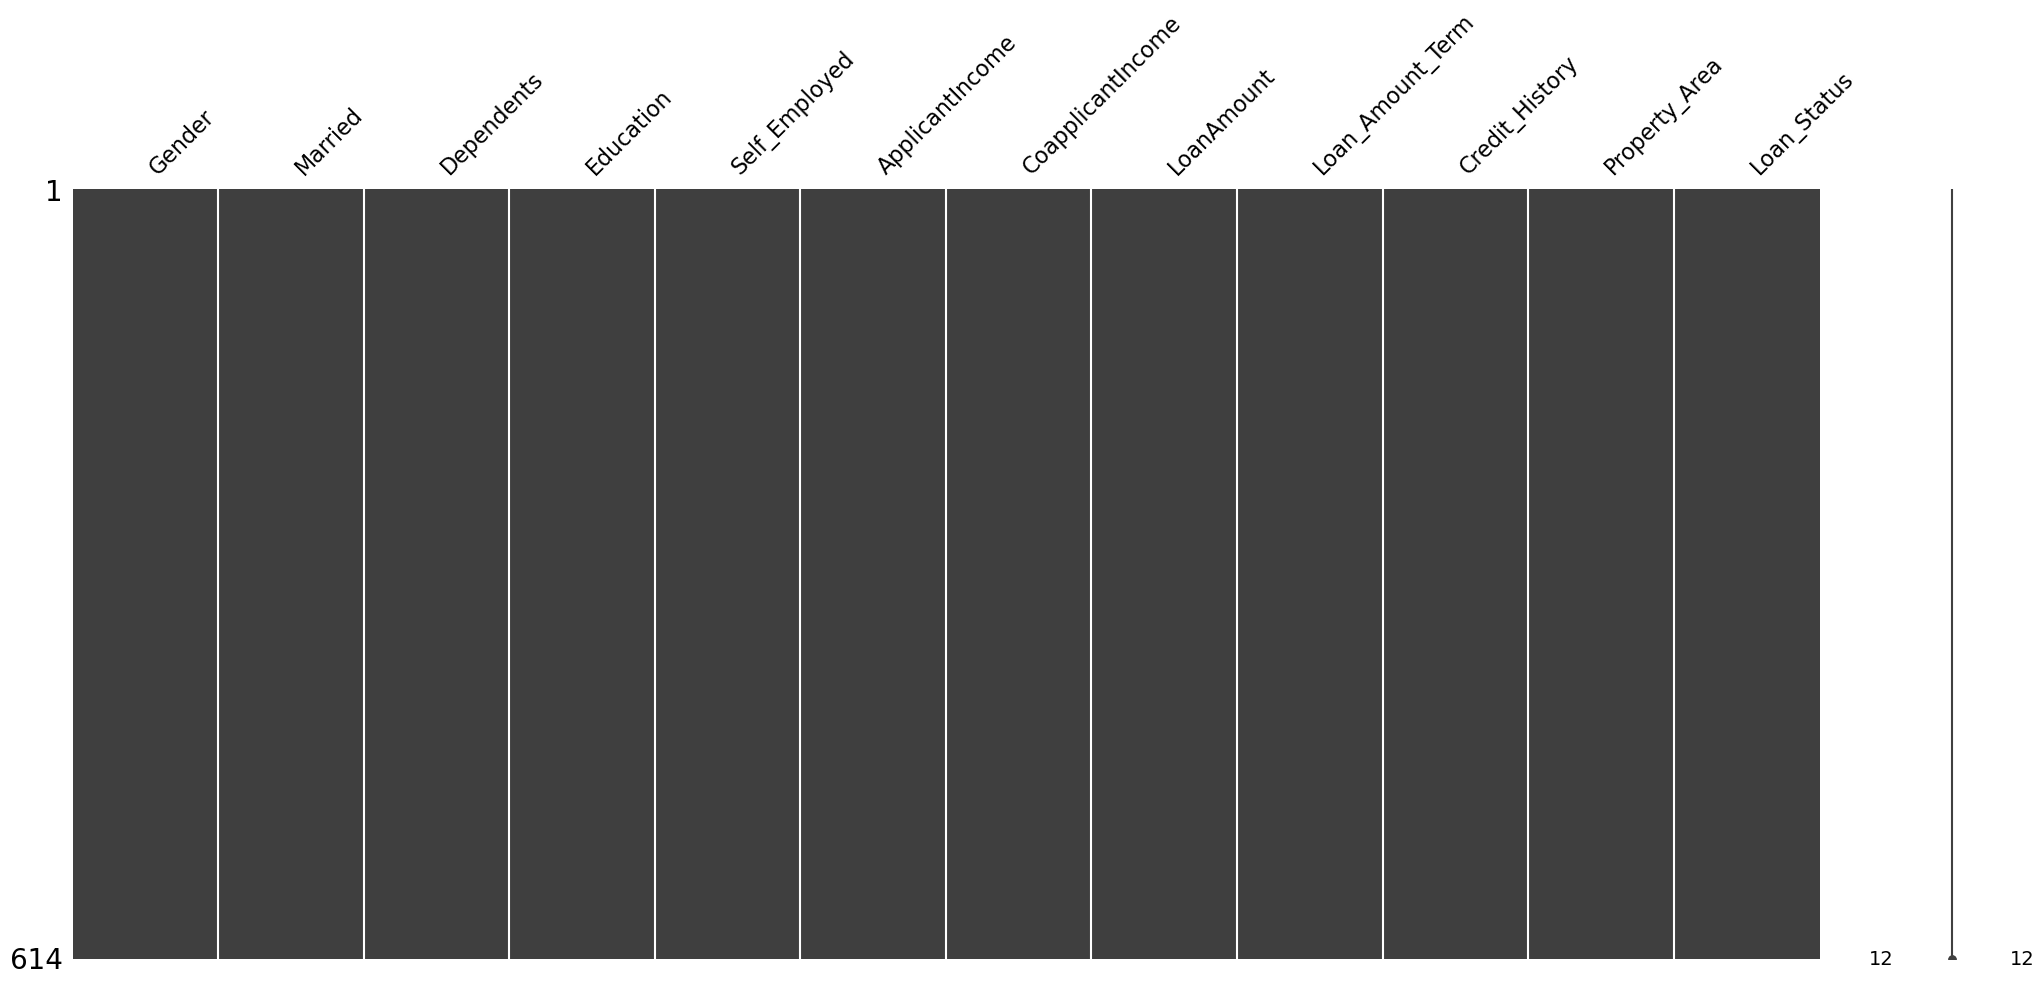

In [13]:
#Checking that no missing values remain in the dataset
msno.matrix(loan)

Next, we call in another function from our data preprocessing module to remove any duplicate rows that we may have in the dataset

In [14]:
#Removing any duplicate rows
loan = remove_duplicates(loan)

The next step for our preprocessing is to remove any outliers that were identified in the exploratory analysis. Including outliers when training a machine learning model can cause the model to become innacurate. To avoid this, we have implemented the handle_outliers function from our data_preprocessing module. This function identifies any outliers and removes them, then prints how many outliers have been dropped from the dataset.

In [15]:
loan = handle_outliers(loan, numerical_columns)

For the feature ApplicantIncome, No of Outliers is 50
For the feature CoapplicantIncome, No of Outliers is 18
For the feature LoanAmount, No of Outliers is 41
For the feature Loan_Amount_Term, No of Outliers is 102


The final step for Data Preprocessing is to balance our data. As shown in Exploratory Analysis, our data is imbalanced. We have used SMOTE to balance the dataset, and visualized the new Loan Status distribution:

In [16]:
#SMOTE only accepts numerical values, so get dummies is used from pandas to convert all categorical values to numerical
loan = pd.get_dummies(loan, drop_first=True)
loan.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0   
1              0                       0                  0   
2              0                       0                  1   
3              0                       1                  0   
4              0                       0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  
0                        0                    1              1  
1                        0                    0              0  
2                        0                    1              1  
3                        0                    1              1  
4                        0                    1              1

In [17]:
#Splitting our dataset into features and target variable, then applying SMOTE
x = loan.drop('Loan_Status_Y', axis=1)
y = loan['Loan_Status_Y']
x, y = apply_smote(x, y)

loan_balanced = pd.concat([x, y], axis=1)

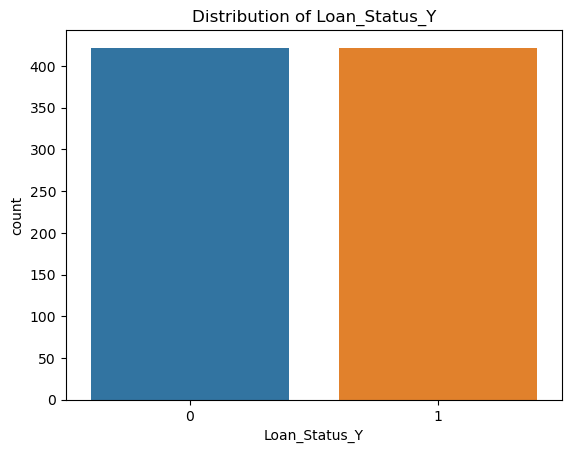

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849           0.000000  146.412162             360.0   
1               4583        1508.000000  128.000000             360.0   
2               3000           0.000000   66.000000             360.0   
3               2583        2358.000000  120.000000             360.0   
4               6000           0.000000  141.000000             360.0   
..               ...                ...         ...               ...   
839             4599           0.000000  133.488410             360.0   
840             5303        1737.466132  169.145675             360.0   
841             5040        1531.787946  168.482239             360.0   
842             4971           0.000000  125.778820             360.0   
843            20326           0.000000  407.827592             360.0   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0          1.000000            1            0             0             0   
1          1.000000            1            1             1             0   
2          1.000000            1            1             0             0   
3          1.000000            1            1             0             0   
4          1.000000            1            0             0             0   
..              ...          ...          ...           ...           ...   
839        0.488410            0            0             0             0   
840        0.414567            1            1             0             0   
841        0.174112            1            0             0             0   
842        0.000000            0            0             0             0   
843        1.000000            1            0             0             0   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0                0                       0                  0   
1                0                       0                  0   
2                0                       0                  1   
3                0                       1                  0   
4                0                       0                  0   
..             ...                     ...                ...   
839              0                       0                  0   
840              0                       0                  0   
841              0                       0                  0   
842              0                       0                  0   
843              0                       0                  0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  
0                          0                    1              1  
1                          0                    0              0  
2                          0                    1              1  
3                          0                    1              1  
4                          0                    1              1  
..                       ...                  ...            ...  
839                        0                    0              0  
840                        0                    0              0  
841                        0                    0              0  
842                        0                    0              0  
843                        0                    0              0  

[844 rows x 15 columns]

In [18]:
#Visualizing new data imbalance
visualize_target(loan_balanced, 'Loan_Status_Y')

# 5. In - Depth Analysis - Logistic Regression

Logistic Regression is a statistical method to analyse a dataset which contains one or more independent variables that determine an outcome. The result is measured with a variable, of which has only two possible outcomes. 

 Logistic regression is suitable for our dataset because it allows us to predict the binary outcome (e.g., approval or denial of a loan) based on a set of independent variables (e.g., Gender, Married status, Dependents, Education level, etc.).

The code below uses the 'train_test_split function' to split the dataset into training and testing sets. We definied 'x' and 'y' with 'x' encompassing the independent variables of the dataset aimed at predicting the target variable represented by y, such as Loan_Status. The code splits our dataset 20% of the dataset will be allocated to the testing set, while 80% will be used for training.

By allocating a portion of data for testing, we can assess model performance on unseen samples, ensuring its generalization ability. This separation is vital for Logistic Regression as it requires distinct datasets for training and testing to assess its predictive accuracy.
Setting a random seed ensures reproducibility, enabling consistent results across different runs.

In [19]:
#Splitting our dataset into train and test sets, with random seed for reproducability:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

The provided code standardizes the features in our dataset using the Standard Scaler. It ensures that all features have a mean of 0 and a standard deviation of 1, aiding in model convergence and performance.

This process is crucial for many machine learning algorithms, including Logistic Regression, as it helps prevent features with larger scales from dominating the model. The Standard Scaler is pulled from our exploratory analysis module, facilitating consistent preprocessing across different datasets and models.

In [20]:
#Fitting a Standard Scaler to the dataset:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

The code below calls the 'train_logistic_regression function' with 'x_train' and 'y_train' as arguments is an important part of the logistic regression module. The purpose of this function is to ensure a smoother process for the initialisation, fitting, and returning of a logistic regression model, which is finetuned to the trainning daata named as 'x_train' for features and 'y_train' for the corresponding labels.

This function is extremely useful to our model and it increases effeciency and maintains consistency. By encapsulating the steps of initialisation, fitting, and fine-tuning into a single function, we ensure a consistent and error-free approach every time we train a logistic regression model. This uniformity is crucial to maintaining the integrity of our models across different datasets and projects.

In [21]:
#Training the Logistic Regression model
lg_model = train_logistic_regression(x_train, y_train)


The code below is a function 'evaluate_model' with three arguments. The function is being defined with the following parameters: 'lg_model', 'x_test', and 'y_test'. The model (lg_model) would use the test features (x_test) to predict outcomes. These predicted outcomes (y_pred) are then compared to the actual outcomes (y_test). It calculates metrics like accuracy, precision, recall, and F1-score, as well as generating a confusion matrix.

This function is incredibly useful when trying to grasp how well the logisitic regression model works on unseen data. It helps in identifying if the model has generalized well from the training data or if it's overfitting/underfitting.

In [22]:
#Evaluate LR Model:
y_pred = evaluate_model(lg_model, x_test, y_test)

Confusion Matrix:
 [[61 25]
 [ 9 74]]

Accuracy: 0.7988165680473372

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        86
           1       0.75      0.89      0.81        83

    accuracy                           0.80       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.80      0.80       169



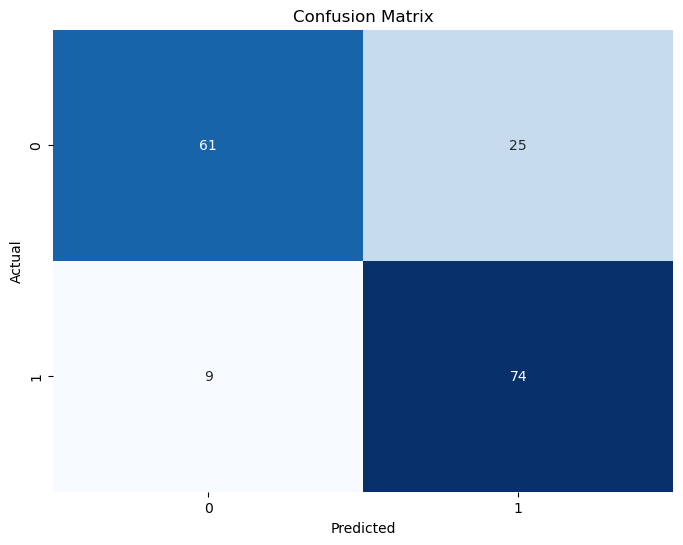

In [23]:
#Visualise Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
visualize_confusion_matrix(conf_matrix)


The code below is the 'plot_roc_curve' function witht the following parameters: 'lg_model', 'x_test', and 'y_test'. This function is used to visualise the performance of our model a ROC (Receiver Operating Characteristic) curve. The funtion takes the paremeters defined to compute a ROC curve. It does this through predicting the probabilities of the classes for the 'x_test' dataset using the 'lg_model'. 

This funtion is useful as the ROC curve provides us with a visual representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) across various threshold settings. 

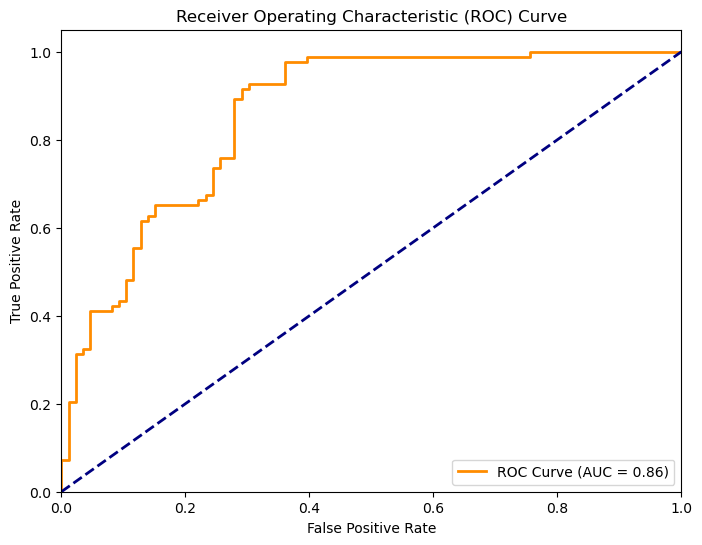

In [24]:
plot_roc_curve(lg_model, x_test, y_test)

# 6. Results

The results from the logistic regression model have brought signifificant insights into its perfomance in prediction loan approval outcomes. Throughout evaluating the models precisiion, F1-score, confusion matrixs andf ROC curve we have a definitve answer to areas we need to improve and area we find to be strong. 

With the confusion matrix these were the following outcomes: True Negatives (TN): 61, False Positives (FP): 25, False Negatives (FN): 9, True Positives (TP): 74. The confusion matrix shows the models perfomance in terms of correct and incorrect predictions. The lower number of False Negatives shows that our model is more conservative in predicting loan denials, which is a much safer option for financial institutions. 

An accuracy of 0.7988 was measured through a sum of True Positives and True Negatives divided by the total number of cases. An accuracy of around 8/10 suggests that our model has excellent perfomance. 

Precision(Approval) measured at 0.75 shows the accuracy of positive predicitions, indicating that when the model predicts loan approval, it is correct 75% of the time. The Recall(Approval) measured at 0.89 indicates the model is very good at identifying actual loan approvals. Finally the F1-score is the mean of Precision and Recall. At 0.81 this suggests the model is very effective at predicting loan approvals.

Through the use of our ROC curve we have found that the logistic regression model has an AUC (Area Under the Curve) of 0.86. This is a strong indicator of the model's performance, as an AUC closer to 1 suggests that the model has a good measure of separability. An AUC od 0.86 shows that there is an 86% chance that the model will be able to distinguish between the positive class (loan approved) and the negative class (loan not approved). The ROC curve rises quickly towards the top-left corner, indicating a high true positive rate (TPR) for most thresholds.

Overall, we have found that although our model may have some flaws the overall performance indicates it can be a valuable tool for financial institutions, assisting in making the loan approval process more efficient and transparent. In conclusion, the logistic regression model built for predicting home loan approvals is statistically sound and practical, but it should be deployed with considerations for fairness and ethical implications in real-world applications. 

# References

https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_train.csv

# Group Reflection


Member | Contribution [% effort]
-|-
AE | 100%
AM | 100%
DG | 100%
SS | 100%

# AE Reflection

Overall, I have really enjoyed this project. It has enhanced my previous knowledge on machine learning models and their uses and execution. Being able to see a project through from start to finish has helped to further advance my knowledge on full data analysis and has been very interesting. In future projects, we could improve our results by diving deeper into data preprocessing to further align our dataset, and experiment with other machine learning models to see if these may have given more accurate results.

# AM Reflection

# DG Reflection

# SS Reflection

Overall we found that although the model performed mostly well although there were some areas for improvement. Further data cleaning and outlier treatment could refine our dataset, improving the models performance. Also gathering more data or integrating external datasets could provide a richer set of features for prediction. The project has been a profound learning experience, enhancing my understanding of ethical AI and the importance of transparency in machine learning models. 